In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [129]:
import os
import cv2
import numpy as np
import random
import zipfile
import tensorflow
import skimage.segmentation
import matplotlib.pyplot as plt

from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/碩二上/多媒體/data/pokemon/image_test.zip', 'r') as zf:
  zf.extractall('/content/image_test')
zf.close()

In [130]:
with zipfile.ZipFile('/content/drive/MyDrive/碩二上/多媒體/data/face/face_test.zip', 'r') as zf:
  zf.extractall('/content/face_test')
zf.close()

## lime

In [4]:
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/碩二上/多媒體/model/256-128/resnet152_5.h5', compile=False) 

In [6]:
# !pip3 install lime

In [144]:
explainer = lime_image.LimeImageExplainer()

def segment_fn(image):
  return skimage.segmentation.quickshift(image, kernel_size=4, max_dist=200, ratio=0.2)

### ex1

In [46]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=3, num_samples=1000, segmentation_fn= segment_fn)

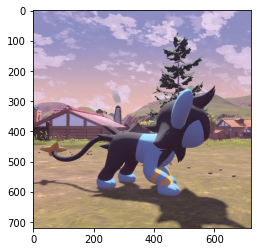

In [48]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

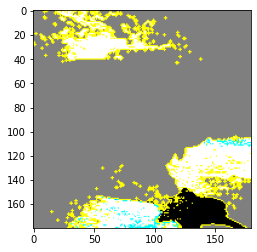

In [64]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

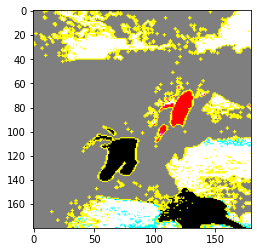

In [65]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

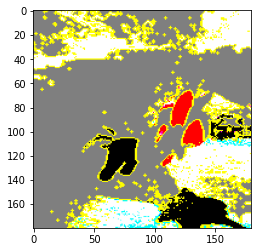

In [66]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

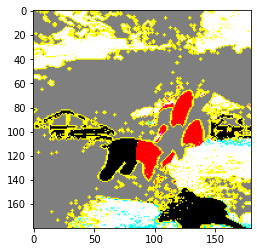

In [67]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

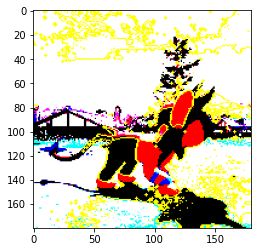

In [52]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

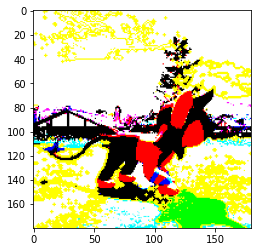

In [63]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### ex2

In [ ]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

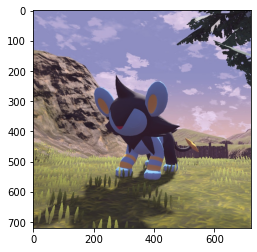

In [69]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

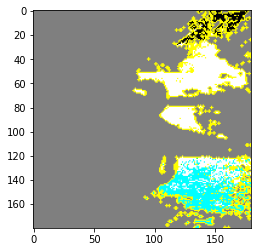

In [70]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

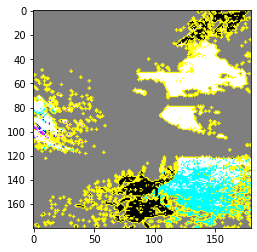

In [71]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

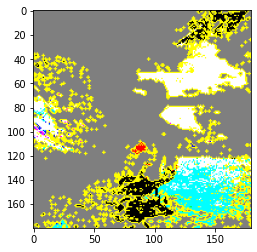

In [72]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

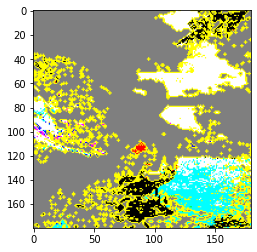

In [74]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

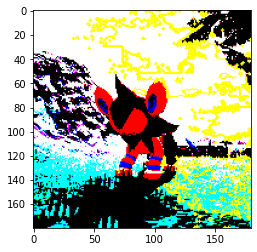

In [75]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### ex3

In [ ]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

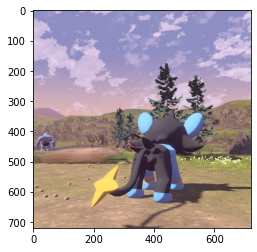

In [77]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

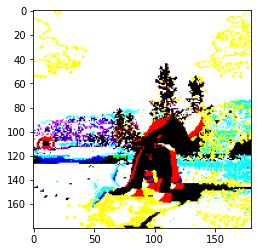

In [78]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

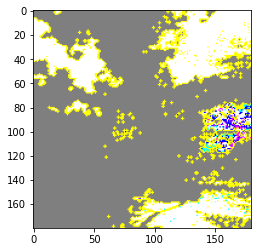

In [79]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

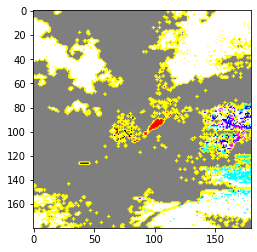

In [80]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

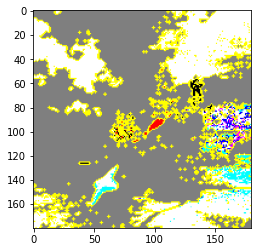

In [81]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### ex4

In [ ]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

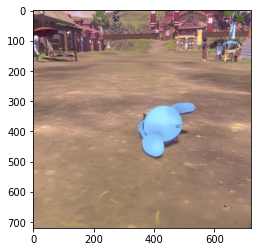

In [88]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

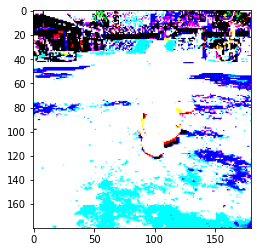

In [84]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

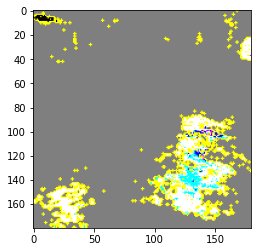

In [85]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

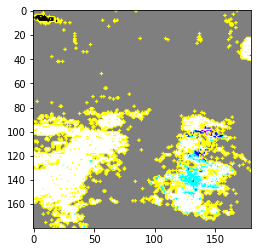

In [86]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

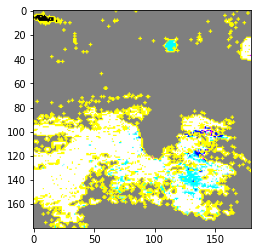

In [87]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### ex5

In [ ]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

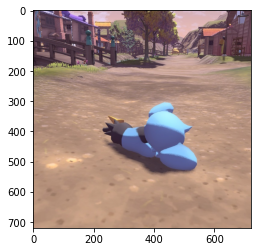

In [90]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

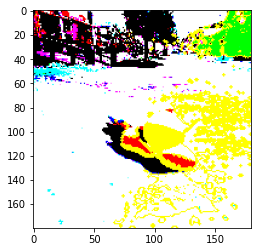

In [91]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

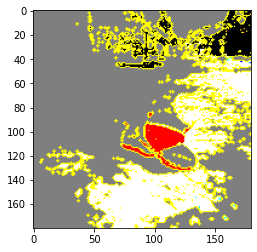

In [92]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

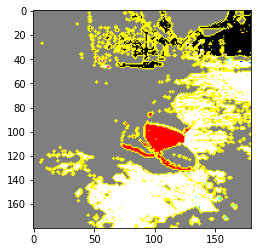

In [93]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

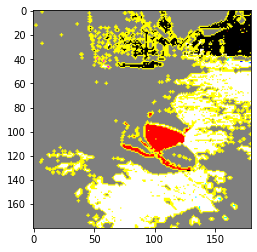

In [94]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### ex6

In [ ]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

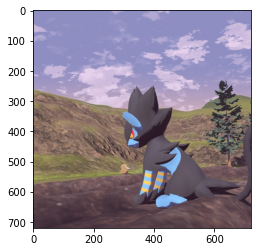

In [96]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

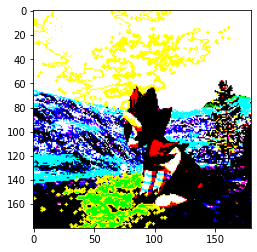

In [97]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

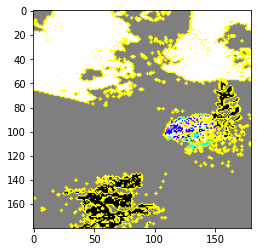

In [98]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

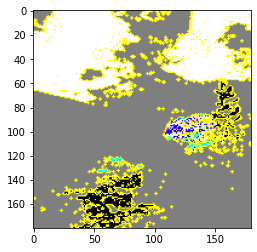

In [99]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

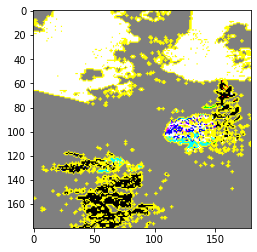

In [100]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### ex7

In [ ]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

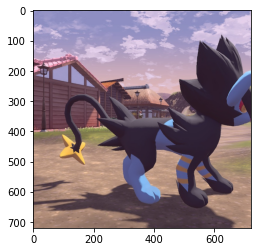

In [102]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

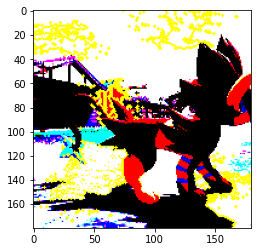

In [103]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

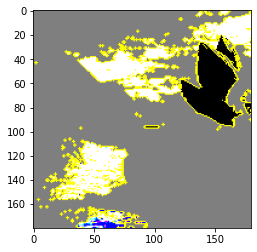

In [104]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

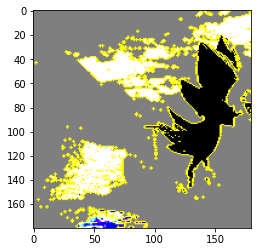

In [105]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

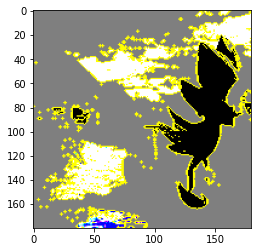

In [106]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### ex8

In [ ]:
imgs = os.listdir('/content/image_test')

img_path = '/content/image_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(180,180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

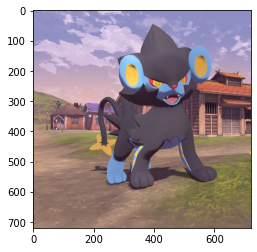

In [108]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

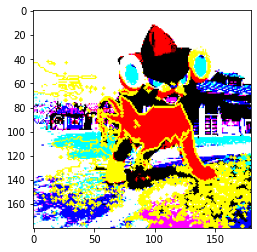

In [109]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

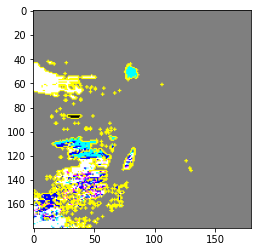

In [110]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

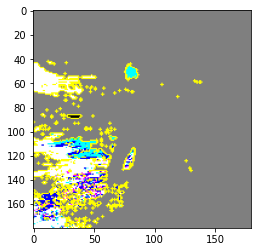

In [111]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

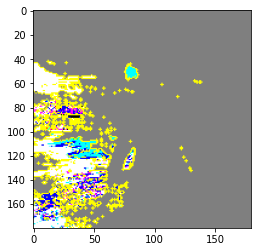

In [112]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

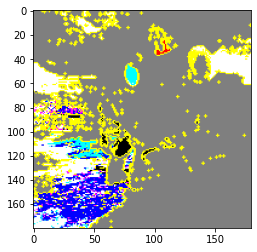

In [113]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=40, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## FACE

In [168]:
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/碩二上/多媒體/model/face/face_resnet101.h5', compile=False) 

In [169]:
imgs = os.listdir('/content/face_test')

img_path = '/content/face_test/' + random.sample(imgs, k=1)[0]
img = image.load_img(img_path, target_size=(360,360))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [170]:
explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=1, num_samples=500, segmentation_fn= segment_fn)

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 8s 8s/step


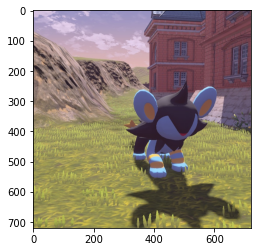

In [171]:
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

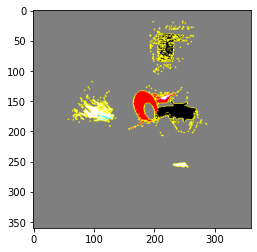

In [172]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

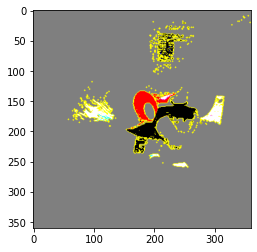

In [173]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

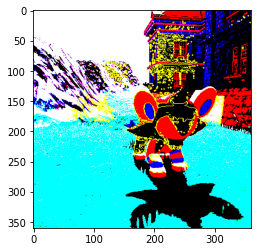

In [174]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=15, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

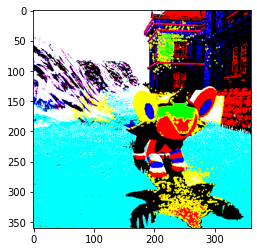

In [175]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))